<a href="https://colab.research.google.com/github/AndrySone/Lab_MMO/blob/main/Lab_8/%D0%98%D0%90%D0%94%D0%B8%D0%9C%D0%9E_%D0%9B%D0%B0%D0%B1_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/ИАДиМО/Лаб_8/Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,55000
2,Consultant,3,70000
3,Senior Consultant,4,85000
4,Manager,5,100000


In [4]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
print ("Матрица признаков"); print(X[:5])
print ("Зависимая переменная"); print(y[:5])

Матрица признаков
[[1]
 [2]
 [3]
 [4]
 [5]]
Зависимая переменная
[ 45000  55000  70000  85000 100000]


Обработка данных (Если она нужна)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# создаем список трансформеров
transformers = [
    ('onehot', OneHotEncoder(), [0]),
    ('imp', SimpleImputer(), [1])
]

# Создаем объект ColumnTransformer и передаем ему список трансформеров
ct = ColumnTransformer(transformers)

# Выполняем трансформацию признаков
X_transformed = ct.fit_transform(X_dirty)
print(X_transformed.shape)
X_transformed

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
print("Зависимая переменная до обработки")
print(y)
y = labelencoder_y.fit_transform(y)
print("Зависимая переменная после обработки")
print(y)

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 10)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

[161894.73684211] [135767.25177229]


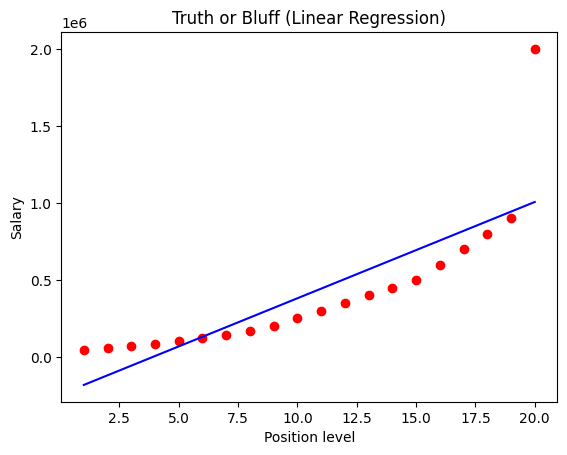

In [7]:
y_pred_lin = lin_reg.predict([[6.5]])
y_pred_poly = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print(y_pred_lin, y_pred_poly)
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

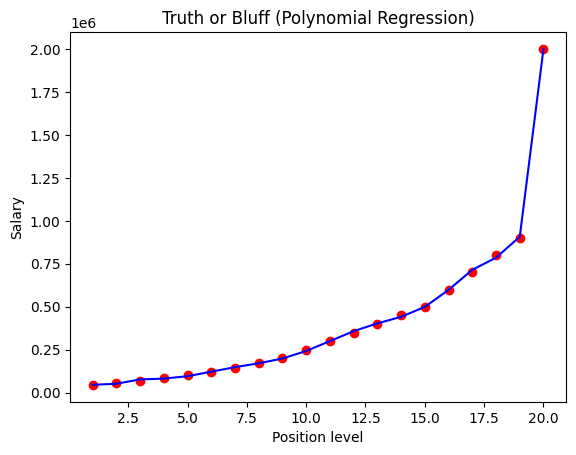

In [8]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

<ipython-input-9-72d1221b8e2e>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


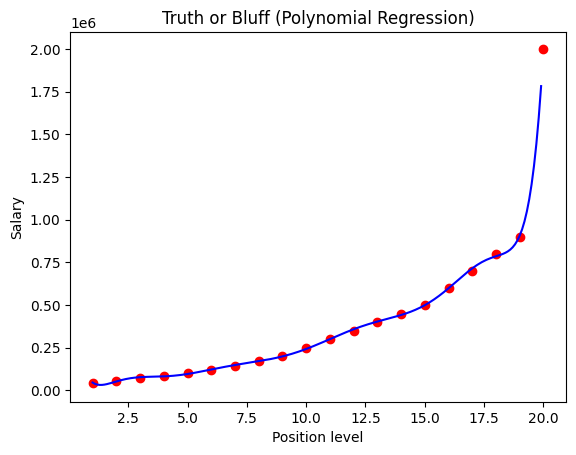

In [9]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()